In [0]:
#ON TITANIC DATA
#PCA using PassengerID, Sex and SibSp to classify Survived.
#Code to create input file for algos

import pandas as pd

f=open("/content/titanic_beforepca.csv");
df = pd.read_csv(f);
# print(df)
from sklearn.preprocessing import StandardScaler
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
df["Sex"]= df["Sex"].replace("male",0)
df["Sex"]= df["Sex"].replace("female",1)
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
df['Age'] = pd.qcut(df['Age'], 10, labels=False)
# df.dropna(axis=0, inplace=True)
df=pd.DataFrame({
    "Age":df['Age'].tolist(),"Embarked":df['Embarked'].tolist(),"Fare":df['Fare'].tolist(),"Fare":df['Fare'].tolist(),
    "Parch":df['Parch'].tolist(),"Pclass":df['Pclass'].tolist(),"Sex":df['Sex'].tolist(),"SibSp":df['SibSp'].tolist(),"Survived":df['Survived'].tolist()
})
df.dropna(axis=0, inplace=True)

# # Separating out the features
x = df.loc[:, features].values
print(x)
# # Separating out the target
# y = df.loc[:,['Survived']].values
# # Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc1', 'pc2','pc3'])
principalDf['label']=df['Survived'].tolist()
# print(principalDf)

#To save to csv -- use below
principalDf.to_csv('file1.csv',index=False)


# f=open("/content/file1.csv");
# df = pd.read_csv(f);
# print(df)



32561
30718


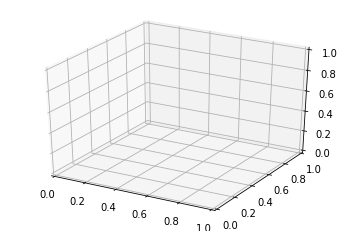

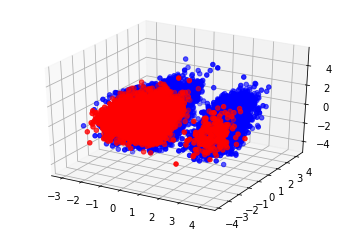

In [0]:
## On Adult Census Data

#Code to create input file for algos

import pandas as pd

f=open("/content/adult.csv");
df = pd.read_csv(f);
# print(df)
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# df["workclass"]= df["workclass"].replace("?",None)
print(len(df))
df=df[df.workclass!="?"]
df=df[df.occupation!="?"]
print(len(df))
# Converting string labels into numbers.
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital.status']=le.fit_transform(df['marital.status'])
df['relationship']=le.fit_transform(df['relationship'])
df['race']=le.fit_transform(df['race'])
df['sex']=le.fit_transform(df['sex'])
df['occupation']=le.fit_transform(df['occupation'])
df['hours.per.week']=le.fit_transform(df['hours.per.week'])
df['income']=le.fit_transform(df['income'])
features = ['workclass', 'age', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation','relationship','race',
           'sex','hours.per.week'];

df=pd.DataFrame({
    "workclass":df['workclass'].tolist(),"age":df['age'].tolist(),"fnlwgt":df['fnlwgt'].tolist(),"education":df['education'].tolist(),
    "education.num":df['education.num'].tolist(),"marital.status":df['marital.status'].tolist(),"occupation":df['occupation'].tolist(),
    "relationship":df['relationship'].tolist(),"race":df['race'].tolist(),"sex":df['sex'].tolist(),"hours.per.week":df['hours.per.week'].tolist(),
    "income":df['income'].tolist()
})
df.dropna(axis=0, inplace=True)
# print(df)
df.to_csv('all-features-encoded-adult.csv',index=False)


# # Separating out the features
x = df.loc[:, features].values
# print(x)
# print(len(x))
# # Separating out the target
y = df.loc[:,['income']].values
# # Standardizing the features

x = StandardScaler().fit_transform(x)
# print(x)
# print(len(x))
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['pc1', 'pc2','pc3'])
# print(principalDf,len(principalDf))

principalDf['label']=df["income"].tolist()

#To save to csv -- use below
principalDf.to_csv('file1.csv',index=False)


# f=open("/content/file1.csv");
# df = pd.read_csv(f);
# print(df)


from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

fig = plt.figure()
ax = plt.axes(projection="3d")
df0=principalDf[principalDf.label==0]
df1=principalDf[principalDf.label==1]

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
# x_line = np.linspace(0, 15, 1000)
# y_line = np.linspace(0, 15, 1000)

# ax.plot3D(x_line, y_line, z_line, 'gray')
# print(len(data[0]))
# print(len(data))
ax.scatter3D(df0['pc2'].tolist(),df0['pc1'].tolist() ,df0['pc3'].tolist(), c='b', cmap='hsv');
ax.scatter3D(df1['pc2'].tolist(),df1['pc1'].tolist() ,df1['pc3'].tolist(), c='r', cmap='hsv');
